# IBM Coursera: Introduction to data visualization, Week 1

## 1- MODEL EVALUATION AND REFINEMENT

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#note : add the following line to plot in jupyter notebook
%matplotlib inline

path='http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
DF = pd.read_csv(path)
DF.replace('?',np.nan,inplace=True)

In [70]:
# import data
Z=DF[['horsepower','curb-weight','engine-size','highway-mpg']]
Y=DF[['price']]

Split the data into 'train-set' and 'test-set'

In [71]:
z_train,z_test,y_train,y_test=train_test_split(Z,Y,test_size=0.3,random_state=0)

Develop a linear regression model for the training set

In [72]:
# 1-Import linear model from skikit-learn
from sklearn.linear_model import LinearRegression
# 2-Create a linear regression object using the constructor
lm=LinearRegression()
# 3-Train the model with the data
lm.fit(z_train,y_train)
# 4-Obtain a prediction
yhat_train=lm.predict(z_train)
yhat_test=lm.predict(z_test)

Generalization error is an estimate of how well the model performs

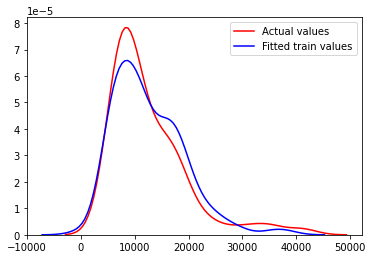

In [73]:
# distribution plot for train set
ax3=sns.distplot(y_train,hist=False,color='r', label='Actual values')
sns.distplot(yhat_train,hist=False,color='b',label='Fitted train values',ax=ax3)

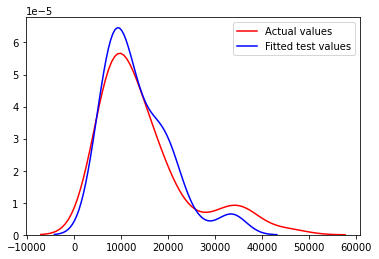

In [74]:
# Distribution plot for test set
ax3=sns.distplot(y_test,hist=False,color='r', label='Actual values')
sns.distplot(yhat_test,hist=False,color='b',label='Fitted test values',ax=ax3)

In [75]:
# examine the score for both training set and test set
lm.score(z_train,y_train)

0.8027498976932893

In [76]:
lm.score(z_test,y_test)

0.7561962236525638

## **GENERALIZATION PERFORMANCE** 
- Generalization error is measure of how well our **DATA** does at predicting previously unseen data
- The error we obtain using our **TESTING DATA** is an approximation of this error


## CROSS VALIDATION
- We perform cross validation to get a better estimate of the generalization error

In [77]:
# calculate cross validation score
from sklearn.model_selection import cross_val_score
scores=cross_val_score(lm,Z,Y,cv=4)
scores

array([0.84466574, 0.7858922 , 0.56412244, 0.46368952])

In [78]:
np.mean(scores)

0.6645924739294807

In [79]:
# calulate cross validation predictions
from sklearn.model_selection import cross_val_predict
predict=cross_val_predict(lm,Z,Y,cv=4)

## 2- MODEL SELECTION: OVERFITTING AND UNDERFITTING

In [80]:
from sklearn.preprocessing import PolynomialFeatures

In [81]:
# Split the data into training and test sets
x_data=DF[['horsepower']]
y_data=DF[['price']]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [91]:
# fit a polynomial of order 5 into the data
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False,
                   order='C')

In [83]:
# use the linear regression to fit the polynomila (note: the order 5 polynomial is a linear model
# because the model parameters are of order 1 meaning : y=b0+b1(X)+b2(X^2)+b3(X^3)+b4(X^4)+b5(X^5)
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

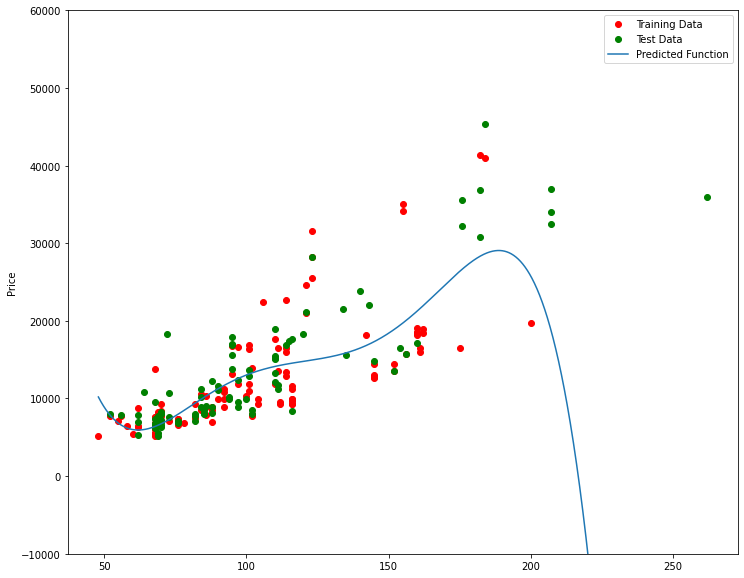

In [85]:
PollyPlot(x_train, x_test, y_train, y_test, poly,pr)

Text(3, 0.75, 'Maximum R^2 ')

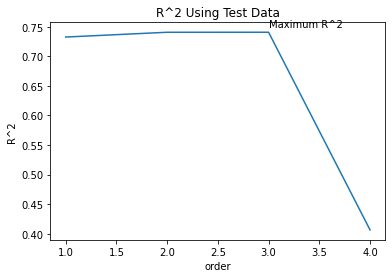

In [86]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lm.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lm.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

In [87]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

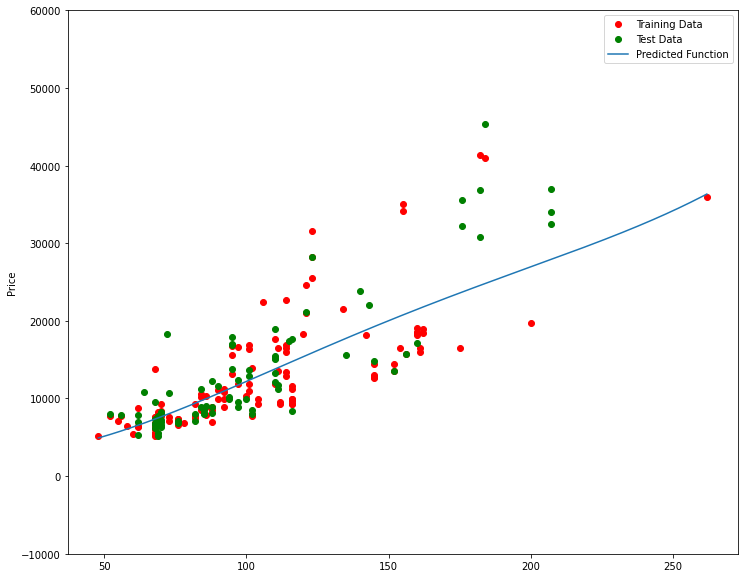

In [88]:
f(order=4, test_data=0.4)

## 3- RIDGE REGRESSION

In [126]:
pr=PolynomialFeatures(degree=2)
#pr = PolynomialFeatures(degree=5)
x_data=DF[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']]
y_data=DF[['price']]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

In [127]:
from sklearn.linear_model import Ridge
RigeModel=Ridge(alpha=0.1)
RigeModel.fit(x_train_pr, y_train)
yhat = RigeModel.predict(x_test_pr)
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [[ 6567.83081933]
 [ 9597.97151399]
 [20836.22326843]
 [19347.69543463]]
test set : [[ 6295.]
 [10698.]
 [13860.]
 [13499.]]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-16): result may not be accurate.
  overwrite_a=True).T


In [128]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

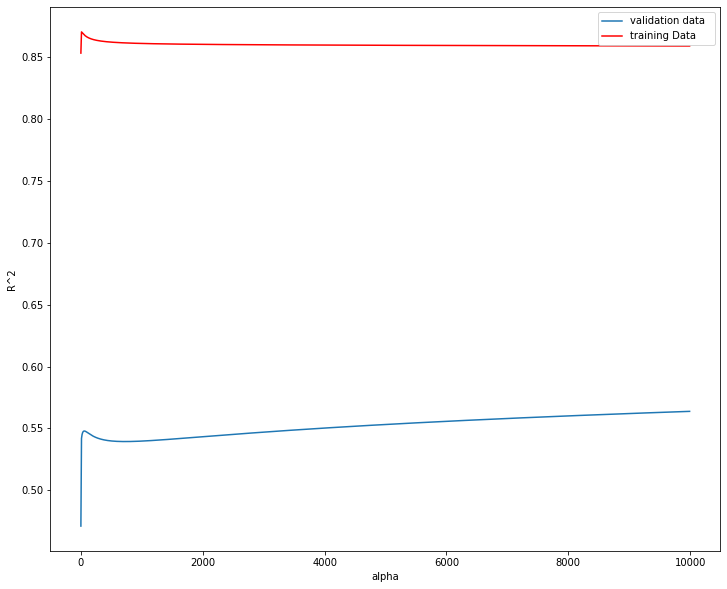

In [129]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

## 4- GRID SEARCH: FIND OPTIMUM VALUE OF HYPERPARAMETERS

In [135]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
parameters=[{'alpha':[0.01,0.1,1,10,100,1000,10000,100000,1000000]}]
RR=Ridge()
Grid1=GridSearchCV(RR,parameters,cv=4)

In [136]:
Grid1.fit(DF[['horsepower','curb-weight','engine-size','highway-mpg']],DF[['price']])

GridSearchCV(cv=4, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    1000000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [137]:
Grid1.best_estimator_

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [138]:
scores=Grid1.cv_results_

In [139]:
scores['mean_test_score']

array([0.66459253, 0.66459305, 0.66459827, 0.66465008, 0.66513615,
       0.66808959, 0.67249168, 0.6569726 , 0.60142652])

In [161]:
parameters2=[{'alpha':[1,10,100,1000],'normalize':[True,False]}]
RRR=Ridge()

In [162]:
Grid2=GridSearchCV(RRR,parameters2,cv=4)

In [163]:
Grid2.fit(DF[['horsepower','curb-weight','engine-size','highway-mpg']],DF[['price']])

GridSearchCV(cv=4, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [1, 10, 100, 1000],
                          'normalize': [True, False]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [164]:
Grid2.best_estimator_

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [165]:
scores=Grid2.cv_results_
scores['mean_test_score']

array([ 0.69000509,  0.66459827,  0.32125534,  0.66465008,  0.01692457,
        0.66513615, -0.03033714,  0.66808959])

In [166]:
scores['params']

[{'alpha': 1, 'normalize': True},
 {'alpha': 1, 'normalize': False},
 {'alpha': 10, 'normalize': True},
 {'alpha': 10, 'normalize': False},
 {'alpha': 100, 'normalize': True},
 {'alpha': 100, 'normalize': False},
 {'alpha': 1000, 'normalize': True},
 {'alpha': 1000, 'normalize': False}]

In [174]:
for param,meanVal in zip(scores['params'],scores['mean_test_score']):
    print(param,'R^2:',meanVal)

{'alpha': 1, 'normalize': True} R^2: 0.6900050906732721
{'alpha': 1, 'normalize': False} R^2: 0.6645982687663075
{'alpha': 10, 'normalize': True} R^2: 0.3212553357006598
{'alpha': 10, 'normalize': False} R^2: 0.6646500769756492
{'alpha': 100, 'normalize': True} R^2: 0.01692456580947077
{'alpha': 100, 'normalize': False} R^2: 0.6651361463299663
{'alpha': 1000, 'normalize': True} R^2: -0.030337139827613907
{'alpha': 1000, 'normalize': False} R^2: 0.6680895877166882


1